Predictive Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:/Cyber World/Visual studio code/Jupyter Notebook/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Exploratory Data Analysis (EDA)

Shape of Dataset:
(550, 7)

Unique elements in features
Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

Duplicate series values
0

About Features: 
Name           100.0
Author         100.0
User Rating    100.0
Reviews        100.0
Price          100.0
Year           100.0
Genre          100.0
dtype: float64

Pairwise correlation of all coulmns in the dataframe


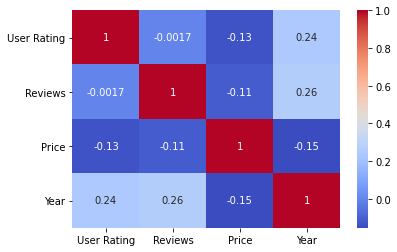

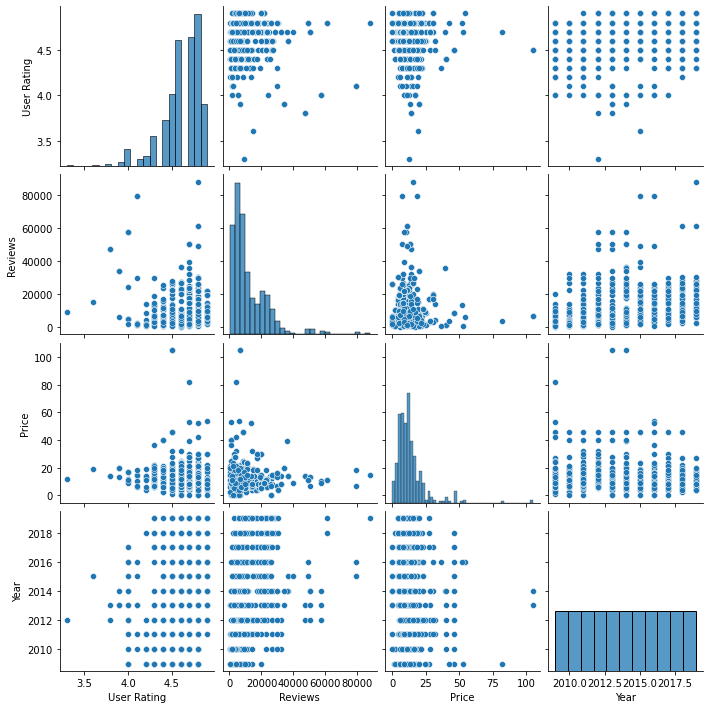

In [3]:
print("Shape of Dataset:")
print(df.shape)
print()
print("Unique elements in features")
print(df.nunique())
print()
print("Duplicate series values")
print(df.duplicated().sum())
print()
print("About Features: ")
x=df.count()/df.isna().count()*100
print(x)
print()
print('\033[1m'+"Pairwise correlation of all coulmns in the dataframe")
df.corr()
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")
sns.pairplot(df)


Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

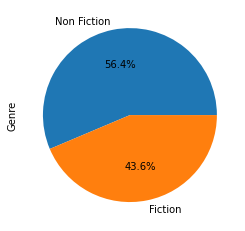

In [4]:
df['Genre'].value_counts().plot.pie(autopct="%.1f%%")
df['Genre'].value_counts()

C:\Users\Akhilesh Ranjan Kr\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


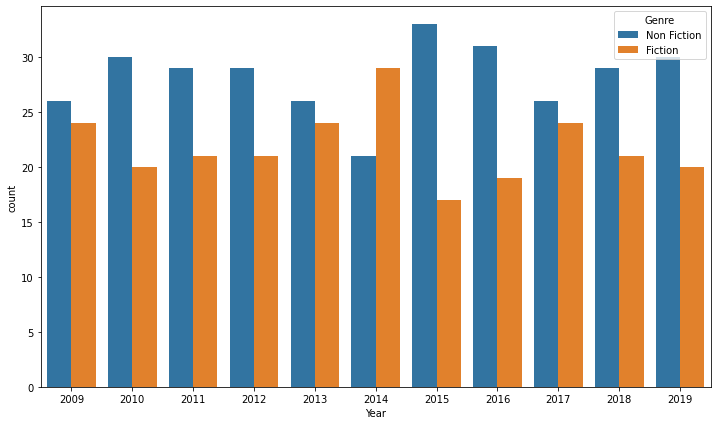

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(df['Year'],hue=df['Genre'])
plt.show()

In [6]:
print('\033[1m'+"max User Rating")
print(df['User Rating'].max())
print()
print('\033[1m'+"Avg User Rating")
print(df['User Rating'].mean())
print()
print("Most often user rating")
print(df['User Rating'].mode())

max User Rating
4.9

Avg User Rating
4.618363636363637

Most often user rating
0    4.8
dtype: float64


In [7]:
a=dict(df['Author'].value_counts())
b=list(a.items())
print(b[:10])

[('Jeff Kinney', 12), ('Suzanne Collins', 11), ('Gary Chapman', 11), ('Rick Riordan', 11), ('American Psychological Association', 10), ('Gallup', 9), ('Dr. Seuss', 9), ('Rob Elliott', 8), ('Stephenie Meyer', 7), ('Stephen R. Covey', 7)]


In [8]:
maxrating=df[df['User Rating']==4.9]
aumax=maxrating.groupby(['Author']).size().reset_index(name='Count')
aumax.sort_values(by='Count', ascending=False).head(20)

,Author,Count
5,Dr. Seuss,8
4,Dav Pilkey,7
7,Eric Carle,7
18,Sarah Young,6
6,Emily Winfield Martin,4
9,J.K. Rowling,3
19,Sherri Duskey Rinker,2
17,Rush Limbaugh,2
1,Bill Martin Jr.,2
13,Mark R. Levin,1


In [9]:
# Highest number of Reviews
print(df[df['Reviews']==df['Reviews'].max()])

                        Name       Author  User Rating  Reviews  Price  Year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       Genre  
534  Fiction  


In [10]:
# Highest number of ratings
print(maxrating[maxrating['Reviews']==maxrating['Reviews'].max()])

                          Name     Author  User Rating  Reviews  Price  Year  \
245  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2012   
246  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2013   
247  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2014   
248  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2015   
249  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2016   
250  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2017   
251  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2018   
252  Oh, the Places You'll Go!  Dr. Seuss          4.9    21834      8  2019   

       Genre  
245  Fiction  
246  Fiction  
247  Fiction  
248  Fiction  
249  Fiction  
250  Fiction  
251  Fiction  
252  Fiction  


C:\Users\Akhilesh Ranjan Kr\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


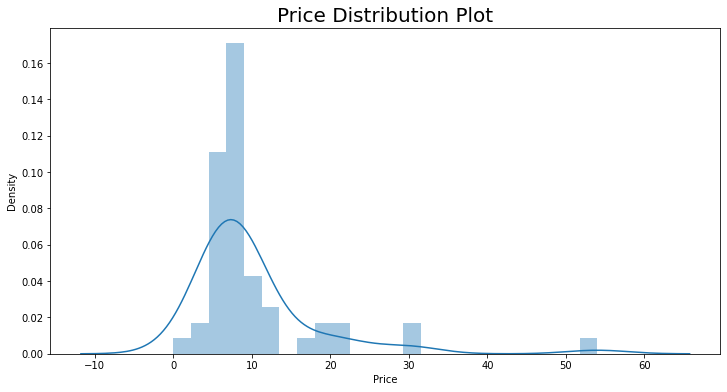

0    8
dtype: int64

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(maxrating['Price'])
plt.title('Price Distribution Plot', fontsize=20)
plt.show()
maxrating['Price'].mode()

In [12]:
from wordcloud import WordCloud, STOPWORDS

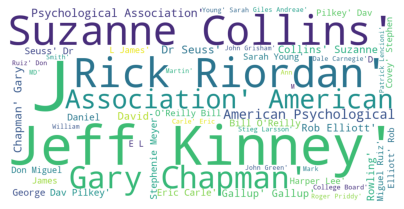

In [13]:
imp_words=df['Author'].to_list()
wordcloud = WordCloud(width=1000, height=500, background_color='White', min_font_size=15).generate(str(imp_words))
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

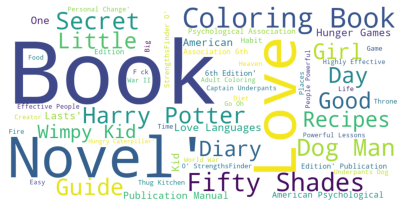

In [14]:
imp_words=df['Name'].to_list()
wordcloud=WordCloud(width=1000, height=500, background_color='White', min_font_size=15).generate(str(imp_words))
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
import autoviz

In [16]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


In [17]:
av=AutoViz_Class()

Shape of your Data Set loaded: (550, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables


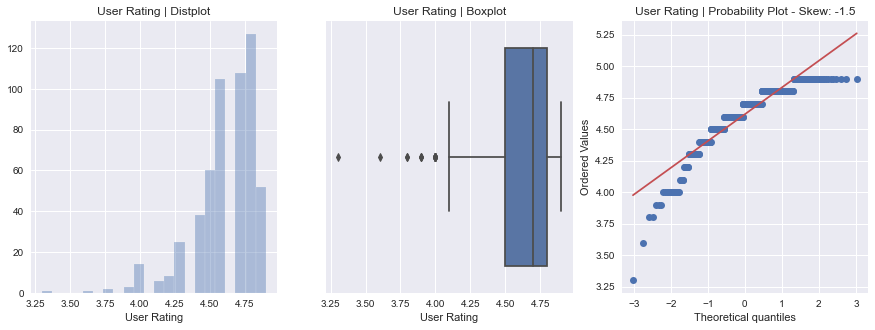

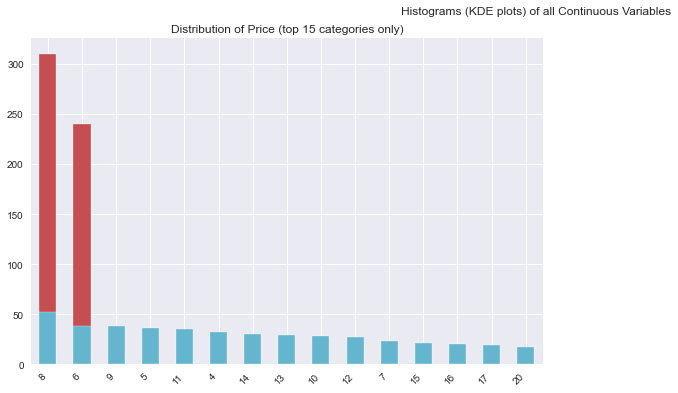

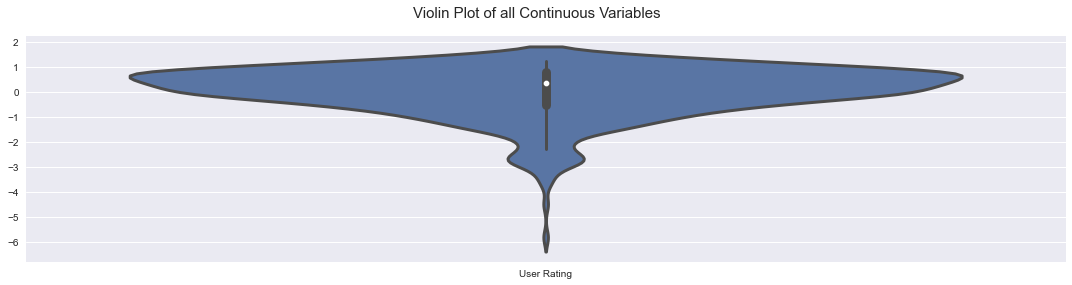

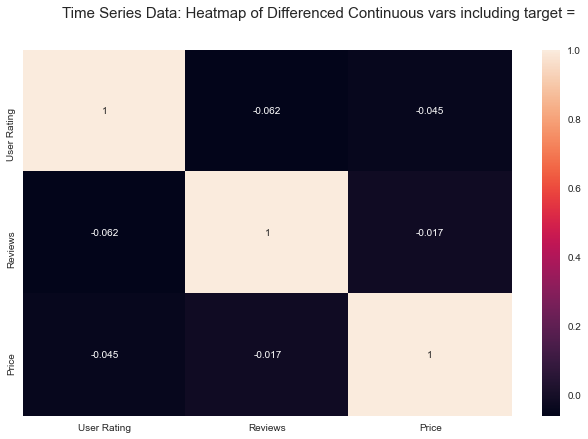

<Figure size 1080x0 with 0 Axes>

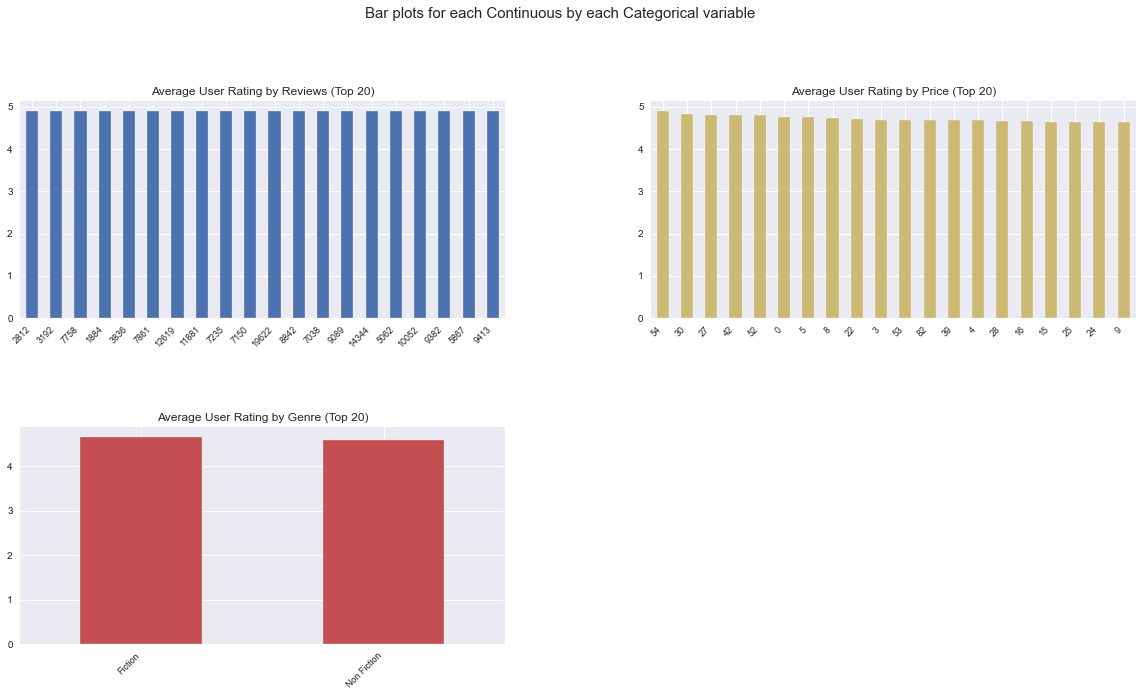

Time to run AutoViz (in seconds) = 5.434

 ###################### VISUALIZATION Completed ########################


In [18]:
autoviz_eda=av.AutoViz('E:/Cyber World/Visual studio code/Jupyter Notebook/bestsellers with categories.csv', verbose=0)

Predicting User Rating of a Book

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

LE = LabelEncoder()
LE.fit(df['Genre'])
df['Genre'] = LE.transform(df['Genre'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [20]:
col = ["Reviews", "Price", "Year", "Genre"]
X = df.iloc[:,3:8].values
y = df[['User Rating']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

Prediction=model.predict(X_test)
Prediction.shape

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.2295578451526144


In [23]:
#RondomForest
from sklearn.ensemble import RandomForestRegressor
m1=RandomForestRegressor()
m1.fit(X_train, y_train)

Prediction=m1.predict(X_test)
Prediction.shape
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.20700630205602216


In [24]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
m2=GradientBoostingRegressor()
m2.fit(X_train, y_train)

Prediction=m2.predict(X_test)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.20983264993794812


In [25]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=11).fit(X_train, y_train)

Prediction=dt.predict(X_test)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

RMSE:  0.2781701692548752


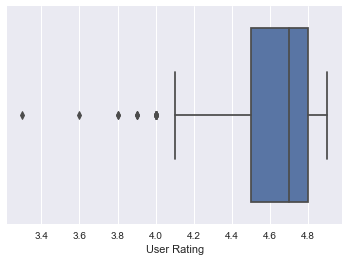

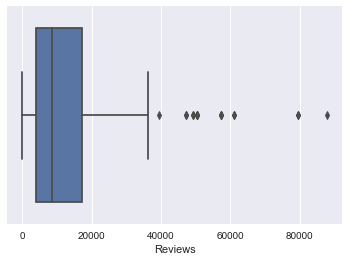

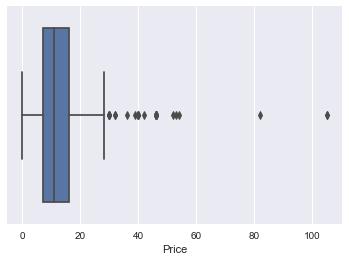

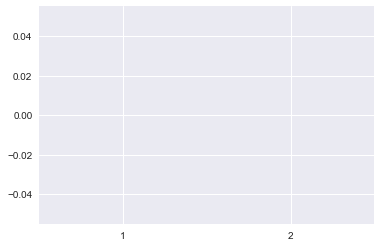

In [26]:
#general trends+outlier
sns.boxplot(df["User Rating"])
plt.show()
sns.boxplot(df["Reviews"])
plt.show()
sns.boxplot(df['Price'])
plt.show()
plt.boxplot([df[df['Genre']=='Fiction']['User Rating'], df[df['Genre']=='Non Fiction']['User Rating']])
plt.show()